# Calculating park entrances

Exploratory notebook calculating where park entrances are. 

This notebook replicates the work in [Park entrance calculation notebook](park_entrance_calculation.ipynb), but using the `safer_parks` module.

Rationale:

- Park entrances are not accurately recorded in open data sets
- Park entrances for our purposes are not defined in the same way as entrances/gates in open data sets (e.g. internal gates).
- We need accurate entrance data for visibility analysis (openness and escape)

`safer_parks` is installed as a local editable package. When it's updated, it needs to be force re-imported, hence the use below of `importlib`.

In [1]:
import safer_parks as sp
import importlib
importlib.reload(sp)

<module 'safer_parks' from '/home/maeve/Reproducible_analysis_development/src/safer_parks/__init__.py'>

In [2]:
# exploring the namespace

# You may need to restart kernel if these are stale

print(dir(sp))
print(dir(sp.bounds))
print(dir(sp.entrances))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'bounds', 'entrances', 'park_polygon']
['LineString', 'Point', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'basic_boundary', 'buffer_network', 'np', 'ox', 'plt', 'remove_repeated_points', 'unary_union']
['LineString', 'Point', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'gpd', 'interpolated', 'np', 'ox', 'plot', 'plt', 'remove_repeated_points', 'tagged', 'unary_union']


## Step 1: get park polygon

This is the section that should be replaced with the more complex definition. A "park polygon" is required for subsequent steps.

In [3]:
location = "Peel Park, Bradford, UK"
# location = "Lister Park, Bradford, UK"

park_polygon = sp.park_polygon(location)

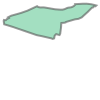

In [4]:
# you can view this

park_polygon

## Step 2: Create buffered polygon for network extraction

Park gets bufferred and then returns graph

In [5]:
Graph = sp.bounds.buffer_network(park_polygon)

## Step 3: extract boundaries

In [6]:
interpolated_entrances = sp.entrances.interpolated(Graph, park_polygon)

Found 18 entrance nodes, note that these need to be deduplicated.
Found 9 entrance nodes after deduplication.


## Step 4: Verify/check boundaries

(<Figure size 800x800 with 1 Axes>, <Axes: >)

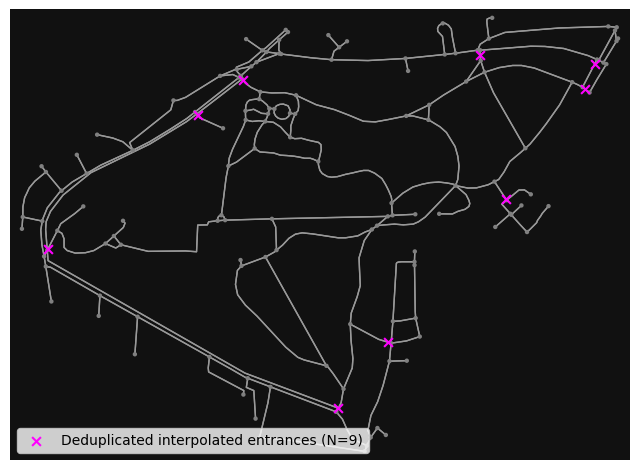

In [7]:
sp.entrances.plot(Graph, interp_points=interpolated_entrances)

We can also compare with OSM tagged entrances

In [8]:
tagged_entrances = sp.entrances.tagged(location)

Found 2 explicitly tagged entrance nodes.


(<Figure size 800x800 with 1 Axes>, <Axes: >)

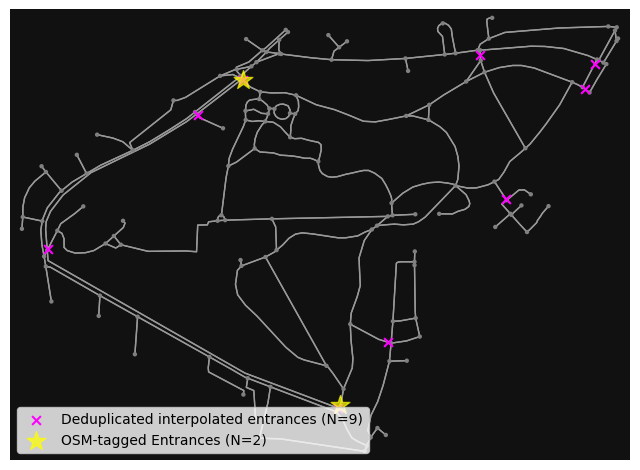

In [9]:
sp.entrances.plot(Graph, interp_points=interpolated_entrances, tagged_points=tagged_entrances)